In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_type = "Binary Cross Entropy"
loss_fn = torch.nn.BCELoss()

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### For k = 1

In [8]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList_Ada1, trainAccList_Ada1, valLossList_Ada1, valAccList_Ada1  = train_model(model, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 16204.6889 - average: 0.2701; Performance: 0.8980
TESTING - loss 1806.242901802063 - performance 0.9340
Epoch 2 completed. Loss - total: 8750.6004 - average: 0.1458; Performance: 0.9502
TESTING - loss 1225.669665336609 - performance 0.9579
Epoch 3 completed. Loss - total: 6549.7322 - average: 0.1092; Performance: 0.9637
TESTING - loss 979.8388320207596 - performance 0.9672
Epoch 4 completed. Loss - total: 5448.0189 - average: 0.0908; Performance: 0.9698
TESTING - loss 840.574708044529 - performance 0.9716
Epoch 5 completed. Loss - total: 4745.8539 - average: 0.0791; Performance: 0.9737
TESTING - loss 750.3734515011311 - performance 0.9748
Epoch 6 completed. Loss - total: 4245.1227 - average: 0.0708; Performance: 0.9764
TESTING - loss 686.7539678812027 - performance 0.9770
Epoch 7 completed. Loss - total: 3862.5885 - average: 0.0644; Performance: 0.9789
TESTING - loss 639.1342440843582 - performance 0.9793
Epoch 8 completed. Loss - tot

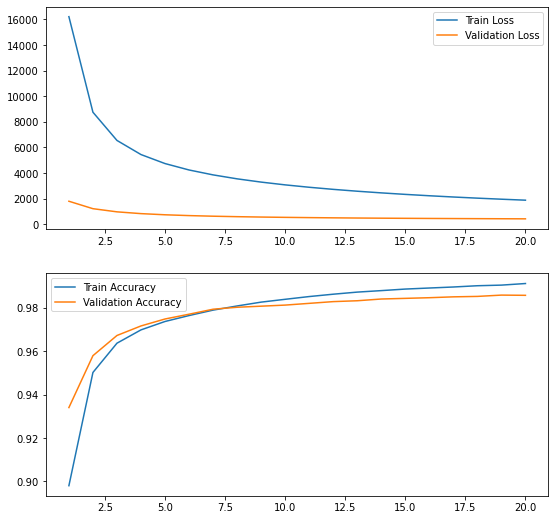

In [9]:
plot_loss_accuracy(trainLostList_Ada1,valLossList_Ada1,trainAccList_Ada1,valAccList_Ada1,num_epochs)

In [10]:
k=1
model2 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd1, trainAccList_sgd1, valLossList_sgd1, valAccList_sgd1  = train_model(model2, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device,lr = learn_rate, lr_scheduler=None, updateWManually=False)


Training on cuda:0
Epoch 1 completed. Loss - total: 12140.1253 - average: 0.2023; Performance: 0.9242
TESTING - loss 1199.880401313305 - performance 0.9578
Epoch 2 completed. Loss - total: 5827.5311 - average: 0.0971; Performance: 0.9677
TESTING - loss 840.2829688191414 - performance 0.9700
Epoch 3 completed. Loss - total: 4481.6932 - average: 0.0747; Performance: 0.9752
TESTING - loss 699.6935612410307 - performance 0.9761
Epoch 4 completed. Loss - total: 3766.2449 - average: 0.0628; Performance: 0.9796
TESTING - loss 622.8656269013882 - performance 0.9788
Epoch 5 completed. Loss - total: 3291.9469 - average: 0.0549; Performance: 0.9825
TESTING - loss 573.5821816325188 - performance 0.9800
Epoch 6 completed. Loss - total: 2942.3944 - average: 0.0490; Performance: 0.9845
TESTING - loss 537.4331479221582 - performance 0.9811
Epoch 7 completed. Loss - total: 2669.5631 - average: 0.0445; Performance: 0.9861
TESTING - loss 511.2446213513613 - performance 0.9817
Epoch 8 completed. Loss - to

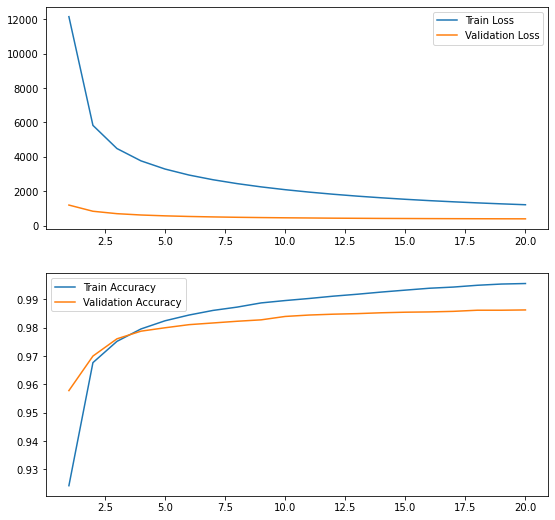

In [11]:
plot_loss_accuracy(trainLostList_sgd1,valLossList_sgd1,trainAccList_sgd1,valAccList_sgd1,num_epochs)

In [12]:
k=1
modelManual = MLPManual(k, learn_rate, False, loss_type)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch  = train_model_manually(modelManual, k, trainset, testset,                                                                                                                                        loss_type, loss_fn, num_epochs, batch_size, validate_model = True,
                                                                          device=device)

Training on cuda:0
Epoch 1 completed. Loss - total: 16634.8594 - average: 0.2772; Performance: 0.9595
TESTING - loss 683.6482789963484 - performance 0.9772
Epoch 2 completed. Loss - total: 2981.1482 - average: 0.0497; Performance: 0.9837
TESTING - loss 536.3724542558193 - performance 0.9819
Epoch 3 completed. Loss - total: 2105.5312 - average: 0.0351; Performance: 0.9890
TESTING - loss 478.078582637012 - performance 0.9833
Epoch 4 completed. Loss - total: 1612.9240 - average: 0.0269; Performance: 0.9925
TESTING - loss 429.67003264278173 - performance 0.9852
Epoch 5 completed. Loss - total: 1298.7179 - average: 0.0216; Performance: 0.9943
TESTING - loss 408.2903663162142 - performance 0.9860
Epoch 6 completed. Loss - total: 1072.0256 - average: 0.0179; Performance: 0.9957
TESTING - loss 392.19418180920184 - performance 0.9870
Epoch 7 completed. Loss - total: 906.8208 - average: 0.0151; Performance: 0.9967
TESTING - loss 378.1428799526766 - performance 0.9874
Epoch 8 completed. Loss - to

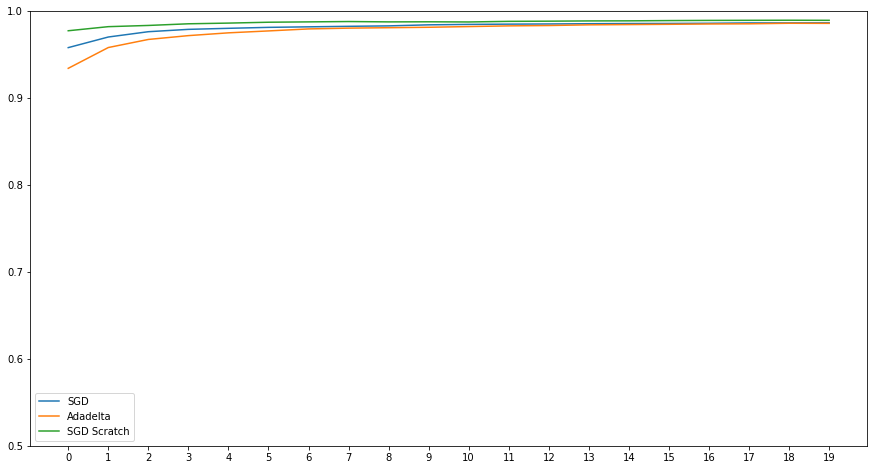

In [13]:
plt.figure(figsize=(15,8))
plt.ylim(0.5,1)
plt.plot(valAccList_sgd1, label="SGD")
plt.plot(valAccList_Ada1, label="Adadelta")
plt.plot(valAccList_sgd1_scratch, label= "SGD Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend();


### For k = 3

In [14]:
k = 3
model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_Ada3, trainAccList_Ada3, \
valLossList_Ada3, valAccList_Ada3  = train_model(model3, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41773.1334 - average: 0.6962; Performance: 0.5028
TESTING - loss 6945.560190200806 - performance 0.5099
Epoch 2 completed. Loss - total: 41543.4909 - average: 0.6924; Performance: 0.5179
TESTING - loss 6905.987040519714 - performance 0.5256
Epoch 3 completed. Loss - total: 41079.7971 - average: 0.6847; Performance: 0.5502
TESTING - loss 6769.558560371399 - performance 0.5766
Epoch 4 completed. Loss - total: 40010.8328 - average: 0.6668; Performance: 0.5984
TESTING - loss 6526.022671699524 - performance 0.6267
Epoch 5 completed. Loss - total: 38440.1106 - average: 0.6407; Performance: 0.6455
TESTING - loss 6218.006112098694 - performance 0.6649
Epoch 6 completed. Loss - total: 36736.7313 - average: 0.6123; Performance: 0.6654
TESTING - loss 5981.023456573486 - performance 0.6717
Epoch 7 completed. Loss - total: 35469.4725 - average: 0.5912; Performance: 0.6785
TESTING - loss 5799.0561170578 - performance 0.6836
Epoch 8 completed. Loss 

In [ ]:
plot_loss_accuracy(trainLostList_Ada3,valLossList_Ada3,trainAccList_Ada3,valAccList_Ada3,num_epochs)

In [ ]:
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay=0.001)

trainLostList_sgd3, trainAccList_sgd3, valLossList_sgd3, valAccList_sgd3  = train_model(model4, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr_scheduler=None)

In [ ]:
plot_loss_accuracy(trainLostList_sgd3, valLossList_sgd3, trainAccList_sgd3, valAccList_sgd3, num_epochs)

In [ ]:
k=3
loss_type = "Binary Cross Entropy"
modelManual3 = MLPManual(k, learn_rate, False, loss_type)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, validate_model = True, device=device)

In [ ]:
plt.figure(figsize=(15,8))
plt.ylim(0.4,1)
plt.plot(valAccList_sgd3, label="SGD")
plt.plot(valAccList_Ada3, label="Adadelta")
plt.plot(valAccList_sgd3_scratch, label= "SGD Scratch")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend();

### Try with the same weights

In [ ]:
k = 3
modelx = MLP(k, "ReLU", loss_type).to(device)

w1 = copy.deepcopy(modelx.state_dict()["layer1.weight"]).to(device)
w2 = copy.deepcopy(modelx.state_dict()["layer2.weight"]).to(device)

optimizer = torch.optim.SGD(modelx.parameters(), lr=learn_rate)

trainLostList_sgd3_w, trainAccList_sgd3_w, valLossList_sgd3_w, valAccList_sgd3_w  = train_model(modelx, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, performance=accuracy, device=device, lr=learn_rate, lr_scheduler=None, updateWManually=True)

In [ ]:
modelManualx = MLPManual(k, learn_rate, loss_type, (w1.t(),w2.t()))
trainLostList_sgd3_scratch_w, trainAccList_sgd3_scratch_w, \
valLossList_sgd3_scratch_w, valAccList_sgd3_scratch_w  = train_model_manually(modelManualx, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                          batch_size, validate_model = True, device=device)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),valAccList_sgd3_w, color = "blue", label = "BP SGD Pytorch")
plt.plot(range(1,21),valAccList_sgd3_scratch_w, color = "green", label = "BP SGD Dogan")

plt.ylim(0.4,1.05)
plt.title("Test Accuracy k=3")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.grid(True)

plt.savefig("doganVSPytorch.png")

plt.show();

# They are gonna be different, because I recreate the data every epoch
# Even without recreating, results are different?

In [ ]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20
loss_type = "Binary Cross Entropy"

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD", "SGD_Scratch"]:
    if activation != "SGD_Scratch":
        model = MLP(K, activation)
        if "features" in activation:
            # deactivate the first layer
            optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
        elif "NTK" in activation:
            paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
            optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
        elif "SGD" in activation:
            optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
        else:
            optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

        print("Activation:",activation)

        trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_type, loss_fn, optimizer, num_epochs,
                                                                            batch_size, validate_model = True, performance=accuracy,
                                                                            device="cuda:0", lr_scheduler=None)
    else:
        print("Activation:",activation)
        modelManual3 = MLPManual(K, learn_rate, False, loss_type)

        trainLostList, trainAccList, valLossList, valAccList  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                  batch_size, validate_model = True, device=device)

    plotValAccuracy(valAccList, num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper